In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
purchase_data=pd.read_csv("C:\\Users\\acer\\Downloads\\QVI_purchase_behaviour.csv")
transactions_data=pd.read_excel("C:\\Users\\acer\\Downloads\\QVI_transaction_data.xlsx")



In [4]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transactions_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
purchase_data.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [7]:
purchase_data.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [8]:
purchase_data.LYLTY_CARD_NBR.nunique()

72637

In [9]:
transactions_data.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [9]:
transactions_data.PROD_QTY.unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

In [10]:
transactions_data[transactions_data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [11]:
transactions_data['DATE'].dtype

dtype('<M8[ns]')

In [12]:
transactions_data1=transactions_data.drop(labels=[69762,69763], axis=0)
print('the shape of transactions1_data is:',transactions_data1.shape)
print('the shape of transactions_data is:',transactions_data.shape)

the shape of transactions1_data is: (264834, 8)
the shape of transactions_data is: (264836, 8)


Notable data inconsistencies are:
RRD is also Red rock deli
GrnWves= Grain Waves
Infzns=infuzions
NCC= Natural Chip co
Smith= smiths
snbts=sunbites
Dorito= doritos

The next step is to make these corrections and have a uniform data

In [13]:
transactions_data1['PROD_BRAND']=transactions_data1.PROD_NAME.str.split().str[0]




In [14]:
transactions_data1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


In [15]:
print(transactions_data1.PROD_BRAND.unique())
print(transactions_data1.PROD_BRAND.nunique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']
29


In [14]:
transactions_data1['PROD_BRAND']=transactions_data1['PROD_BRAND'].replace(['GrnWves','NCC','Infzns','Dorito','Smith','RRD','Snbts'],['Grain','Natural','Infuzions','Doritos','Smiths','Red','Sunbites'])

In [17]:
print(transactions_data1.PROD_BRAND.unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'Cheezels' 'Infuzions' 'Red' 'Pringles' 'Tyrrells'
 'Cobs' 'Woolworths' 'French' 'Tostitos' 'Cheetos' 'Sunbites']


In [15]:
final_df=pd.merge(transactions_data1,purchase_data,how='left',on=['LYLTY_CARD_NBR'])
final_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [19]:
final_df.shape

(264834, 11)

# EXPLORATORY DATA ANALYSIS

In [20]:
final_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [21]:
final_df['LIFESTAGE'].value_counts(normalize=True)*100

OLDER SINGLES/COUPLES     20.570999
RETIREES                  18.790261
OLDER FAMILIES            18.348852
YOUNG FAMILIES            16.460122
YOUNG SINGLES/COUPLES     13.735774
MIDAGE SINGLES/COUPLES     9.481411
NEW FAMILIES               2.612580
Name: LIFESTAGE, dtype: float64

Majority of the customers are older singles/couples while new families make up the least number of customers.

Older singles/couples are 8 times more likely to buy chips than new families 

In [22]:
final_df.groupby(['LIFESTAGE'])['TOT_SALES'].describe()

,count,mean,std,min,25%,50%,75%,max
LIFESTAGE,,,,,,,,
MIDAGE SINGLES/COUPLES,25110.0,7.357678,2.532071,1.5,5.6,7.4,9.2,29.5
NEW FAMILIES,6919.0,7.289124,2.557880,1.5,5.4,7.4,9.2,27.0
OLDER FAMILIES,48594.0,7.253307,2.488841,1.5,5.4,7.4,8.8,29.5
OLDER SINGLES/COUPLES,54479.0,7.386823,2.511223,1.5,5.8,7.4,9.2,29.5
RETIREES,49763.0,7.364325,2.529464,1.5,5.6,7.4,9.2,29.5
YOUNG FAMILIES,43592.0,7.252709,2.486029,1.5,5.4,7.4,8.8,29.5
YOUNG SINGLES/COUPLES,36377.0,7.158515,2.628117,1.5,5.4,7.4,8.8,27.0


In [23]:
final_df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PROD_BRAND                  object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [24]:
final_df['TOT_SALES']=final_df['TOT_SALES'].astype(int)

In [81]:
final_df.groupby(['LIFESTAGE']).sum()['TOT_SALES']/1813174

LIFESTAGE
MIDAGE SINGLES/COUPLES    0.095596
NEW FAMILIES              0.026028
OLDER FAMILIES            0.182584
OLDER SINGLES/COUPLES     0.208241
RETIREES                  0.189494
YOUNG FAMILIES            0.163749
YOUNG SINGLES/COUPLES     0.134309
Name: TOT_SALES, dtype: float64

In [78]:
final_df.groupby(['LIFESTAGE']).mean()['TOT_SALES'].sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     6.930689
RETIREES                  6.904427
MIDAGE SINGLES/COUPLES    6.902947
NEW FAMILIES              6.820783
OLDER FAMILIES            6.812693
YOUNG FAMILIES            6.810997
YOUNG SINGLES/COUPLES     6.694477
Name: TOT_SALES, dtype: float64

The older single,couples are the spend the most in buying chips closely followed by retirees and young singles /couples spend the least in buying chips.

In [76]:
final_df['TOT_SALES'].sum()

1813174

the total sales was $1813174

In [27]:
final_df.groupby(['PREMIUM_CUSTOMER']).sum()['TOT_SALES']/1813174

PREMIUM_CUSTOMER
Budget        0.349762
Mainstream    0.388435
Premium       0.261803
Name: TOT_SALES, dtype: float64

In [72]:
final_df.groupby(['PREMIUM_CUSTOMER']).mean()['TOT_SALES']

PREMIUM_CUSTOMER
Budget        6.807637
Mainstream    6.905724
Premium       6.811606
Name: TOT_SALES, dtype: float64

In [28]:
final_df['PREMIUM_CUSTOMER'].value_counts(normalize=True)

Mainstream    0.385102
Budget        0.351756
Premium       0.263142
Name: PREMIUM_CUSTOMER, dtype: float64

In [29]:
final_df.groupby(['PROD_BRAND']).sum()['TOT_SALES'].sort_values(ascending=False)

PROD_BRAND
Kettle        370029
Doritos       223656
Smiths        211509
Pringles      166868
Red            90523
Infuzions      90078
Old            89005
Thins          80821
Twisties       78215
Tostitos       72603
Cobs           64591
Grain          49830
Tyrrells       49194
Natural        42318
Cheezels       38400
WW             28597
CCs            17218
Cheetos        15149
Woolworths     12329
Sunbites        8363
French          7929
Burger          5949
Name: TOT_SALES, dtype: int32

Kettle was the highest performing chip brand while French chips and burger chips performed poorly

In [66]:
prod_qty=final_df.groupby(['PROD_BRAND']).sum()['PROD_QTY'].sort_values(ascending=False)
prod_qty

PROD_BRAND
Kettle        79051
Smiths        60339
Doritos       53816
Pringles      48019
Red           33646
Infuzions     27119
Thins         26929
WW            19461
Cobs          18571
Tostitos      18134
Twisties      18118
Old           17805
Grain         14726
Natural       14106
Tyrrells      12298
Cheezels       8747
CCs            8609
Woolworths     8395
Sunbites       5692
Cheetos        5530
Burger         2970
French         2643
Name: PROD_QTY, dtype: int64

In [31]:
final_df['YEAR']=final_df['DATE'].dt.year
final_df['MONTH']=final_df['DATE'].dt.month

In [32]:
final_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6,Natural,YOUNG SINGLES/COUPLES,Premium,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6,CCs,MIDAGE SINGLES/COUPLES,Budget,2019,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2,Smiths,MIDAGE SINGLES/COUPLES,Budget,2019,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15,Smiths,MIDAGE SINGLES/COUPLES,Budget,2018,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13,Kettle,MIDAGE SINGLES/COUPLES,Budget,2018,8


In [33]:
final_df.groupby(['YEAR']).sum()['TOT_SALES']

YEAR
2018    915875
2019    897299
Name: TOT_SALES, dtype: int32

# DATA VIZUALIZATION

In [40]:
#the code below is to get the unique values months of specific years in year column
group=final_df.groupby('YEAR')
monthsforyears=group.apply(lambda x:x['MONTH'].unique())
monthsforyears

YEAR
2018    [10, 8, 9, 11, 7, 12]
2019       [5, 6, 2, 3, 4, 1]
dtype: object

the date column in this dataset in incomplete with missing data on the second half of the year for year 2019 and 1st half for year 2018.
Making comparison with years is not feasible therefore. given that the data in theory has all months it willbe treated as one business year

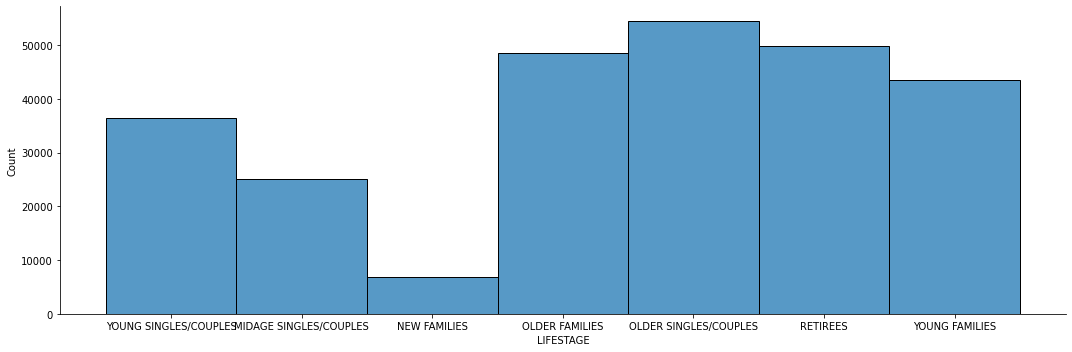

In [50]:
sns.displot(final_df,x='LIFESTAGE',aspect=3)










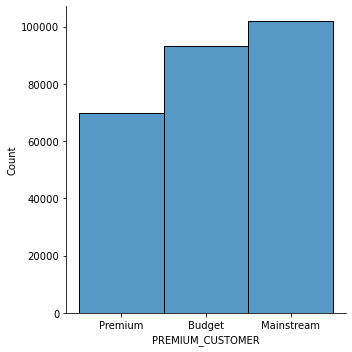

In [46]:
 sns.displot(final_df,x='PREMIUM_CUSTOMER')

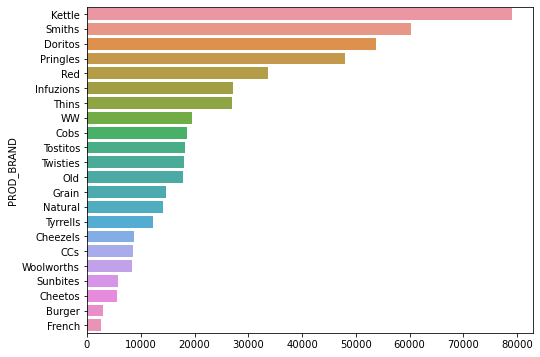

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(x=prod_qty.values,y=prod_qty.index)
plt.show()

Kettle is the top most purchased brand,Smiths brand , Doritos and Pringles followed respectively as the preferred brand by consumers.
French was the least purchased chips followed closely with Burger .cheetos and sunbites brand as least purchased.

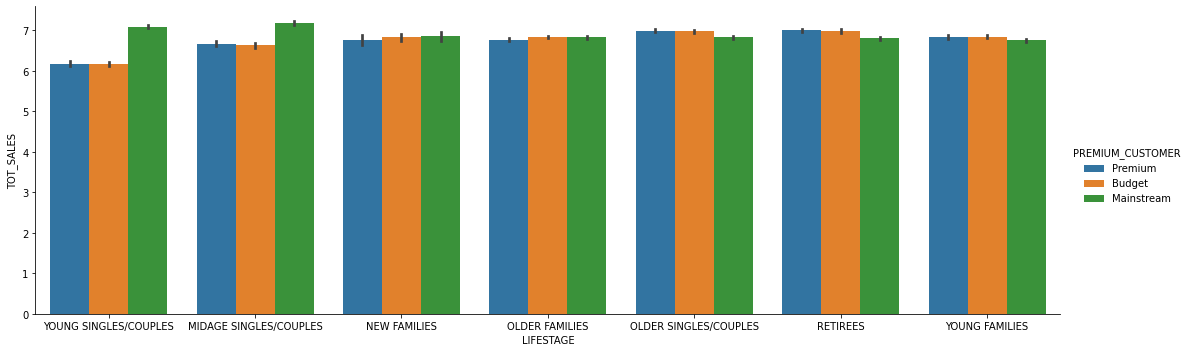

In [56]:
sns.catplot(data=final_df,x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',kind='bar',aspect=3)

In Young singles/couples and midage single/couples clusters marjority of them exuded mainstream buying behavious while the rest of the clusters show equal distribution of buying patterns.


In [26]:
print(final_df.columns)
repeat_customers=final_df[final_df.duplicated(subset=['LYLTY_CARD_NBR'],keep=False)]
repeat_customers

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Old,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264827,2019-03-16,272,272236,269976,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,Infuzions,YOUNG SINGLES/COUPLES,Premium
264828,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,Thins,YOUNG SINGLES/COUPLES,Premium
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,YOUNG SINGLES/COUPLES,Premium


In [27]:
final_df.shape

(264834, 11)

In [30]:
repeat_customers['LYLTY_CARD_NBR'].nunique()

53572

# SUMMARY

Kettle, Smiths, Doritos are the leading purchased chips brands in the store while the French and Burger chips brands were the least bought by customers.

58% of the revenue generated from sale of chips are from older customers with older singles/couples make up 20.8%, retirees make up 18.9% and older families 18.3%

